In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# data 출처 : EU open data portal
data = pd.read_csv('data/covid-19.csv', encoding="cp949")
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-20,20,4,2020,88,3,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-19,19,4,2020,63,0,Afghanistan,AF,AFG,37172386.0,Asia


In [3]:
data.shape

(12596, 11)

In [4]:
data.isnull().sum()

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                       40
countryterritoryCode       134
popData2018                103
continentExp                 0
dtype: int64

In [5]:
# NAN값 귀찮으니까 그냥 drop
data=data.dropna()

In [6]:
data.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
geoId                      0
countryterritoryCode       0
popData2018                0
continentExp               0
dtype: int64

In [7]:
data.shape

(12389, 11)

In [8]:
# 국가수 200개
data['countriesAndTerritories'].value_counts()

Czechia                  115
China                    115
Belgium                  115
Brazil                   115
Canada                   115
                        ... 
Botswana                  23
Malawi                    21
South_Sudan               18
Sao_Tome_and_Principe     15
Yemen                     14
Name: countriesAndTerritories, Length: 200, dtype: int64

In [9]:
data['continentExp'].value_counts()

Europe     4388
Asia       3417
America    2150
Africa     2014
Oceania     420
Name: continentExp, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12389 entries, 0 to 12595
Data columns (total 11 columns):
dateRep                    12389 non-null object
day                        12389 non-null int64
month                      12389 non-null int64
year                       12389 non-null int64
cases                      12389 non-null int64
deaths                     12389 non-null int64
countriesAndTerritories    12389 non-null object
geoId                      12389 non-null object
countryterritoryCode       12389 non-null object
popData2018                12389 non-null float64
continentExp               12389 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.1+ MB


In [11]:
# 국가별 나라별 확진자수, 사망자수만
data1 = data.groupby(['countriesAndTerritories','dateRep'])['cases','deaths'].agg(['sum'])
data1.head()

cases deaths
                                     sum    sum
countriesAndTerritories dateRep                
Afghanistan             2019-12-31     0      0
                        2020-01-01     0      0
                        2020-01-02     0      0
                        2020-01-03     0      0
                        2020-01-04     0      0

In [12]:
level0 = data1.columns.get_level_values(0)
level0

Index(['cases', 'deaths'], dtype='object')

In [13]:
level1 = data1.columns.get_level_values(1)
level1

Index(['sum', 'sum'], dtype='object')

In [14]:
data1.columns = level0+'_'+level1
data1

cases_sum  deaths_sum
countriesAndTerritories dateRep                          
Afghanistan             2019-12-31          0           0
                        2020-01-01          0           0
                        2020-01-02          0           0
                        2020-01-03          0           0
                        2020-01-04          0           0
...                                       ...         ...
Zimbabwe                2020-04-19          1           0
                        2020-04-20          0           0
                        2020-04-21          0           0
                        2020-04-22          3           0
                        2020-04-23          0           0

[12389 rows x 2 columns]

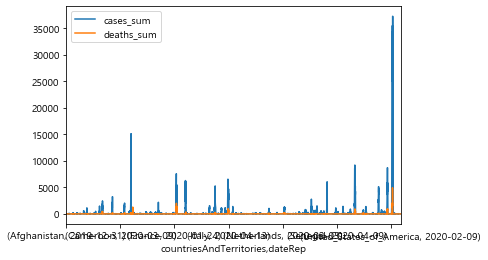

In [15]:
ax = data1.plot()

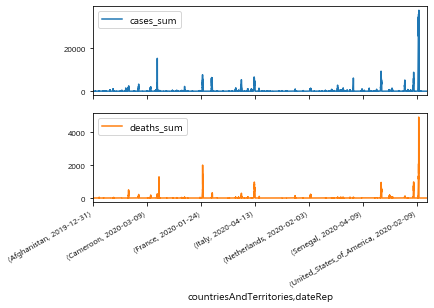

In [16]:
ax = data1.plot(subplots = True, fontsize = 8)

In [17]:
data2 = data.groupby(['continentExp','dateRep'])['cases','deaths'].agg(['sum'])
data2.head()

cases deaths
                          sum    sum
continentExp dateRep                
Africa       2019-12-31     0      0
             2020-01-01     0      0
             2020-01-02     0      0
             2020-01-03     0      0
             2020-01-04     0      0

In [18]:
level0 = data2.columns.get_level_values(0)
level0

Index(['cases', 'deaths'], dtype='object')

In [19]:
level1 = data2.columns.get_level_values(1)
level1

Index(['sum', 'sum'], dtype='object')

In [20]:
data2.columns = level0+'_'+level1
data2

cases_sum  deaths_sum
continentExp dateRep                          
Africa       2019-12-31          0           0
             2020-01-01          0           0
             2020-01-02          0           0
             2020-01-03          0           0
             2020-01-04          0           0
...                            ...         ...
Oceania      2020-04-19         57           3
             2020-04-20         33           1
             2020-04-21         17           2
             2020-04-22         28           4
             2020-04-23          9           2

[575 rows x 2 columns]

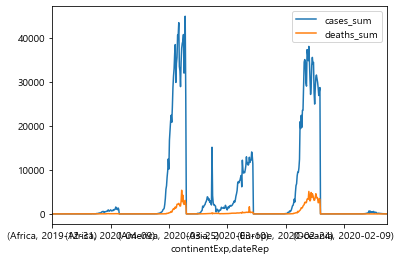

In [21]:
ax = data2.plot()

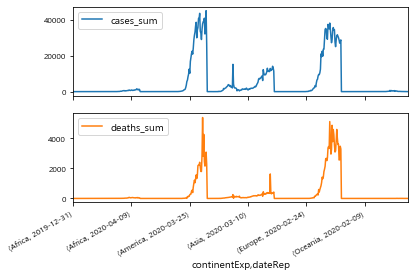

In [22]:
ax = data2.plot(subplots = True, fontsize = 8)

## South_Korea's cases and deaths

In [33]:
df_korea = data[data['countriesAndTerritories'] == 'South_Korea']
print(df_korea.head())

          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
10655  2020-04-23   23      4  2020      8       2             South_Korea   
10656  2020-04-22   22      4  2020     11       1             South_Korea   
10657  2020-04-21   21      4  2020      9       1             South_Korea   
10658  2020-04-20   20      4  2020     13       2             South_Korea   
10659  2020-04-19   19      4  2020      8       2             South_Korea   

      geoId countryterritoryCode  popData2018 continentExp  
10655    KR                  KOR   51635256.0         Asia  
10656    KR                  KOR   51635256.0         Asia  
10657    KR                  KOR   51635256.0         Asia  
10658    KR                  KOR   51635256.0         Asia  
10659    KR                  KOR   51635256.0         Asia  


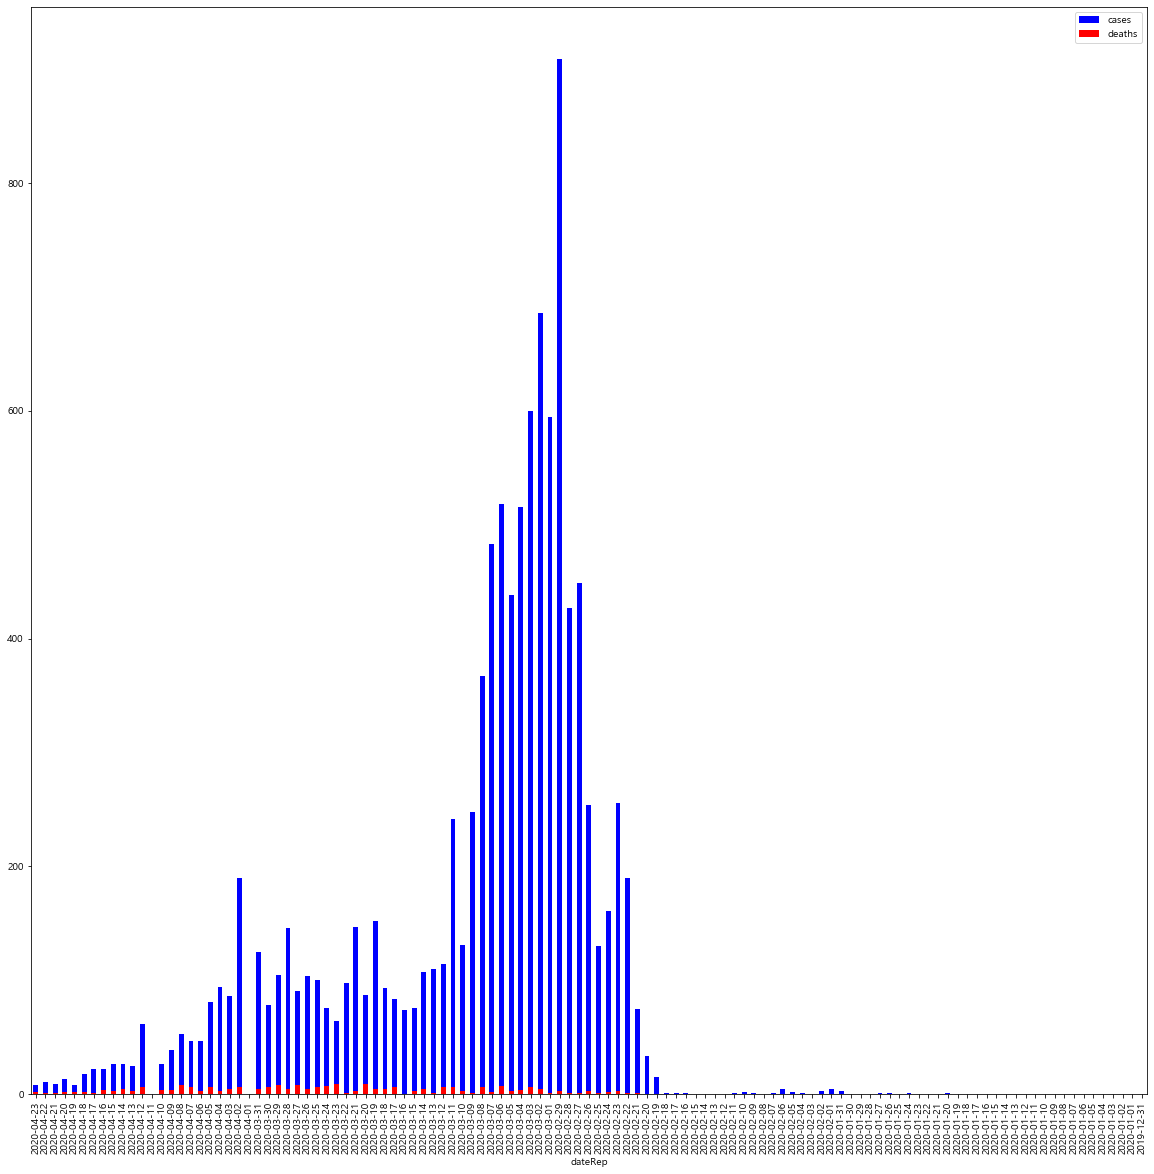

In [34]:
plt.rcParams["figure.figsize"]=20,20
df_korea.plot(kind = 'bar', x = 'dateRep', y = 'cases', color = 'blue')
ax1 = plt.gca()
df_korea.plot(kind = 'bar', x = 'dateRep', y = 'deaths', color = 'red', ax = ax1)
plt.show()


In [56]:
#!pip install ffmpeg-python

In [55]:
#!pip install pycountry

  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627366 sha256=71f8eabf10854483edb860f4c8b87bebfbe6ff170cbb47f4ddeea09c13c31dc7
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\00\77\65\5f318c3c30b046b450a385ecfc690125f8a270cdb0f3f483b4
Successfully built pycountry


In [58]:
#!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=6639ed911a8fd430767b5769e07e53f3782b7dde6ede362bad5048607d95e5ca
  Stored in directory: c:\users\tj\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [59]:
import pycountry
import plotly.express as px
import pandas as pd

In [63]:
from matplotlib.animation import FuncAnimation

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning:

Glyph 8722 missing from current font.

C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning:

Glyph 8722 missing from current font.



ValueError: unknown file extension: .mp4

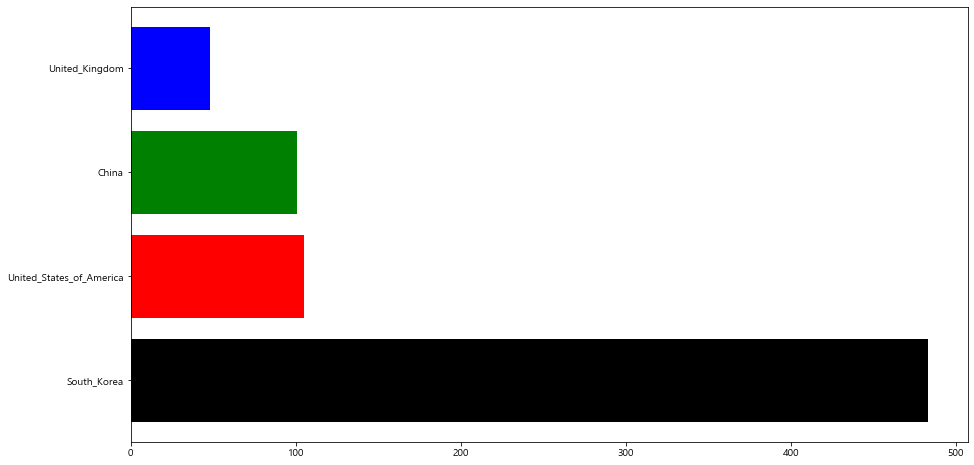

In [69]:
# unique() --> 각 날짜에 대해서만 고유한 값을 선택
list_dates = data['dateRep'].unique()
# print(list_dates) # Uncomment to see the dates
fig, ax = plt.subplots(figsize=(15, 8))

# 5개 국가 선택
list_countries = ['South_Korea', 'China', 'Japna', 'United_States_of_America', 'United_Kingdom']
list_colors = ['black', 'red', 'green', 'blue', 'yellow']

# plot_bar ()는 FuncAnimation 클래스 객체
def plot_bar(some_date):
    df2 = data[data['dateRep'].eq(some_date)]
    ax.clear()
    # 확인 된 열만 내림차순으로 가져온다.    
    df3 = df2.sort_values(by = 'cases', ascending = False)
    # 상위 5 개의 확인 된 국가를 선택한다.
    df4 = df3[df3['countriesAndTerritories'].isin(list_countries)]

    # 애니메이션 속도를 줄인다.
    #sleep(0.2)

    # ax.barh() ---> 가로 bar plot을  만든다
    return ax.barh(df4['countriesAndTerritories'], df4['cases'], color= list_colors)

my_anim = FuncAnimation(fig = fig, func = plot_bar,
                    frames= list_dates, blit=True,
                    interval=20)

path_mp4 = r'C:\ani.mp4'
my_anim.save(filename = path_mp4, writer = 'ffmpeg',
             fps=30,
             extra_args= ['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
plt.show()